In [1]:
library(caret) #For downsampling
library(caTools) #To split our data
library(tidyverse)
library(gmodels)

Loading required package: ggplot2

Loading required package: lattice

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()


In [2]:
data <- read.csv('bank.csv')

In [3]:
head(data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [4]:
str(data)

'data.frame':	45211 obs. of  17 variables:
 $ age      : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job      : chr  "management" "technician" "entrepreneur" "blue-collar" ...
 $ marital  : chr  "married" "single" "married" "married" ...
 $ education: chr  "tertiary" "secondary" "secondary" "unknown" ...
 $ default  : chr  "no" "no" "no" "no" ...
 $ balance  : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing  : chr  "yes" "yes" "yes" "yes" ...
 $ loan     : chr  "no" "no" "yes" "no" ...
 $ contact  : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ day      : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month    : chr  "may" "may" "may" "may" ...
 $ duration : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ y        : chr  "no" "no" "no" "no" ...


In [5]:
data$job<-as.factor(data$job)
data$marital<-as.factor(data$marital)
data$education<-as.factor(data$education)
data$default<-as.factor(data$default)
data$housing<-as.factor(data$housing)
data$loan<-as.factor(data$loan)
data$contact<-as.factor(data$contact)
data$month<-as.factor(data$month)
data$poutcome<-as.factor(data$poutcome)
data$y<-as.factor(data$y)

In [6]:
#Dataframe with only customers who bought
data_yes<-subset(data, y == 'yes')

In [7]:
#Dataframe with only nos
data_no<-subset(data, y == 'no')

In [8]:
head(data_yes)
length(data_yes$y)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
84,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
87,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
88,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
130,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
169,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
271,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes


[1] 5289

In [9]:
head(data_no)
length(data_no$y)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


[1] 39922

In [10]:
set.seed(1)
data_yes_downsampled<- data_yes %>% slice_sample(n = 5000) #Randomly selcting 5000 rows
data_no_downsampled<- data_no %>% slice_sample(n = 5000)

In [11]:
data_downsampled<-rbind(data_yes_downsampled,data_no_downsampled)

In [12]:
#Randomly mixing the dataframe
set.seed(1)
data_downsampled<- data_downsampled %>% slice_sample(n = 10000) 

In [13]:
#Splitting into training and testing
set.seed(1)
index = sample.split(Y = data_downsampled$y, SplitRatio = 0.7)

#subsetting into Train data
data_downsampled_train = data_downsampled[index,]

#subsetting into Test data
data_downsampled_test = data_downsampled[!index,]

In [14]:
table(data_downsampled_train$y)
table(data_downsampled_test$y)
#A balanced train and test dataset


  no  yes 
3500 3500 


  no  yes 
1500 1500 

In [15]:
str(data_downsampled_train)

'data.frame':	7000 obs. of  17 variables:
 $ age      : int  29 55 33 49 37 57 53 26 45 33 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 7 2 7 7 10 1 5 2 2 10 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 3 2 3 2 2 1 2 3 2 2 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 3 1 3 3 2 2 3 2 1 2 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 2 1 ...
 $ balance  : int  121 2102 61 503 277 658 -670 26 153 79 ...
 $ housing  : Factor w/ 2 levels "no","yes": 2 2 1 2 2 1 1 2 1 1 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 2 2 2 1 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 3 1 1 1 1 1 1 1 1 1 ...
 $ day      : int  30 12 19 6 4 10 11 15 18 29 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 9 9 2 4 4 6 6 9 6 2 ...
 $ duration : int  1500 64 836 310 244 724 86 899 706 144 ...
 $ campaign : int  2 4 3 4 2 1 2 1 9 3 ...
 $ pdays    : int  -1 371 -1 200 -1 -1 -1 -1 -1 -1 ...
 $ previo

### Correlation

In [16]:
library(corrplot)

corrplot 0.92 loaded



In [17]:
num_data <- data_downsampled_train[c('age','balance','duration','campaign','pdays','previous','day')]

In [18]:
corr<-cor(num_data)

In [19]:
corr

,age,balance,duration,campaign,pdays,previous,day
age,1.000000000,0.11250241,-0.007573105,-0.004014905,0.008928996,0.01497492,0.005636925
balance,0.112502407,1.00000000,0.014750612,-0.014736265,0.014237265,0.02201000,0.012790291
duration,-0.007573105,0.01475061,1.000000000,-0.042913822,-0.029778964,-0.01591181,-0.012486993
campaign,-0.004014905,-0.01473626,-0.042913822,1.000000000,-0.102756759,-0.05842126,0.150939892
pdays,0.008928996,0.01423726,-0.029778964,-0.102756759,1.000000000,0.52609528,-0.067235881
previous,0.014974922,0.02201000,-0.015911811,-0.058421261,0.526095283,1.00000000,-0.063609166
day,0.005636925,0.01279029,-0.012486993,0.150939892,-0.067235881,-0.06360917,1.000000000


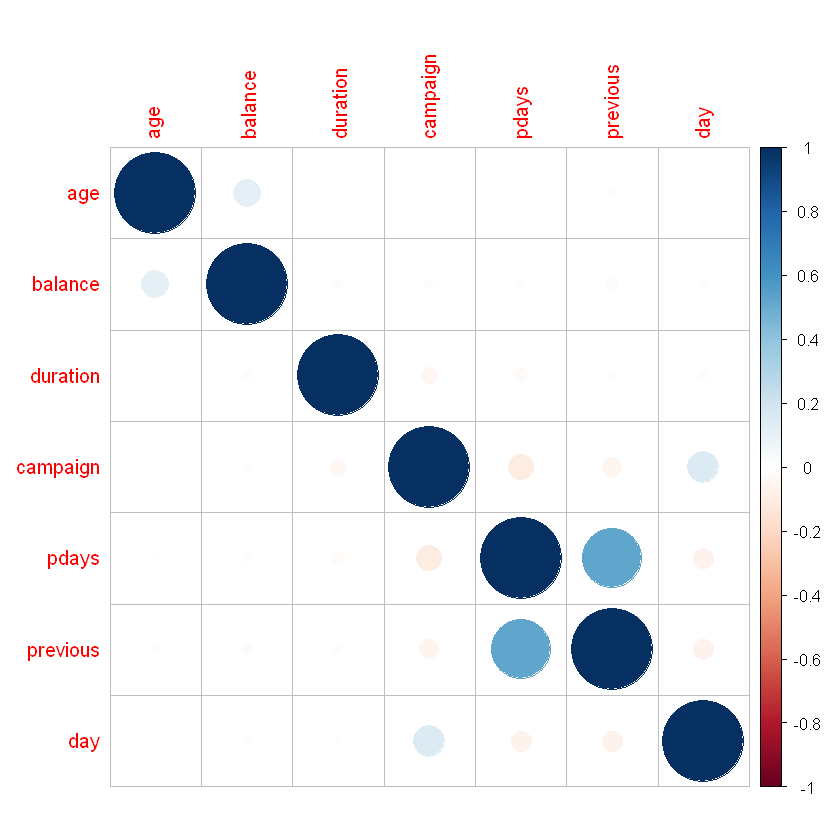

In [20]:
corrplot(corr)

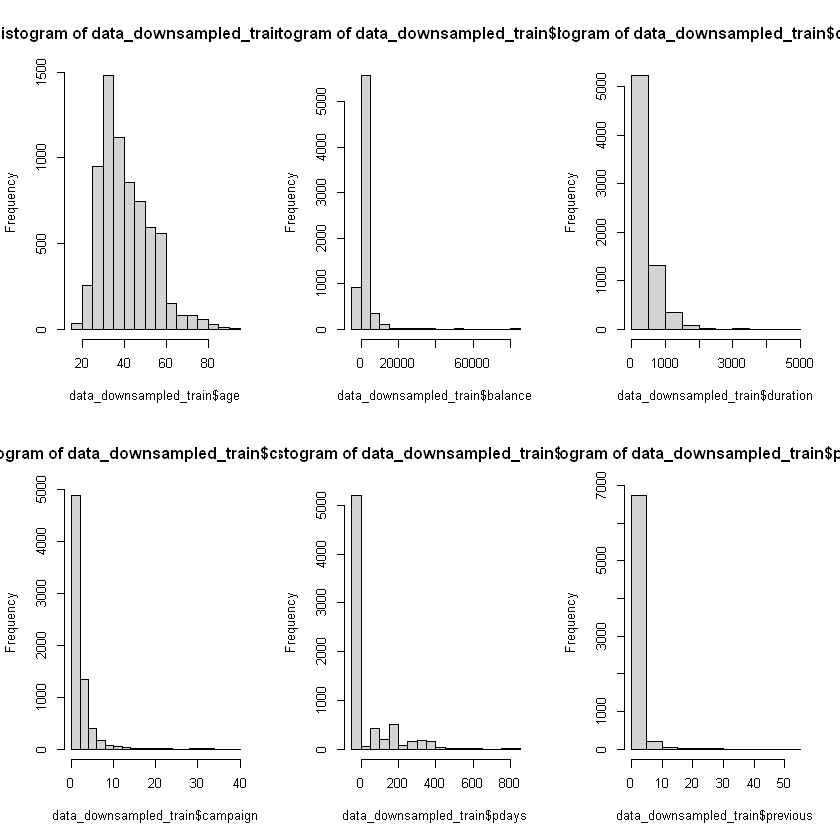

In [21]:
par(mfrow=c(2,3))
hist(data_downsampled_train$age)
hist(data_downsampled_train$balance)
hist(data_downsampled_train$duration)
hist(data_downsampled_train$campaign)
hist(data_downsampled_train$pdays)
hist(data_downsampled_train$previous)

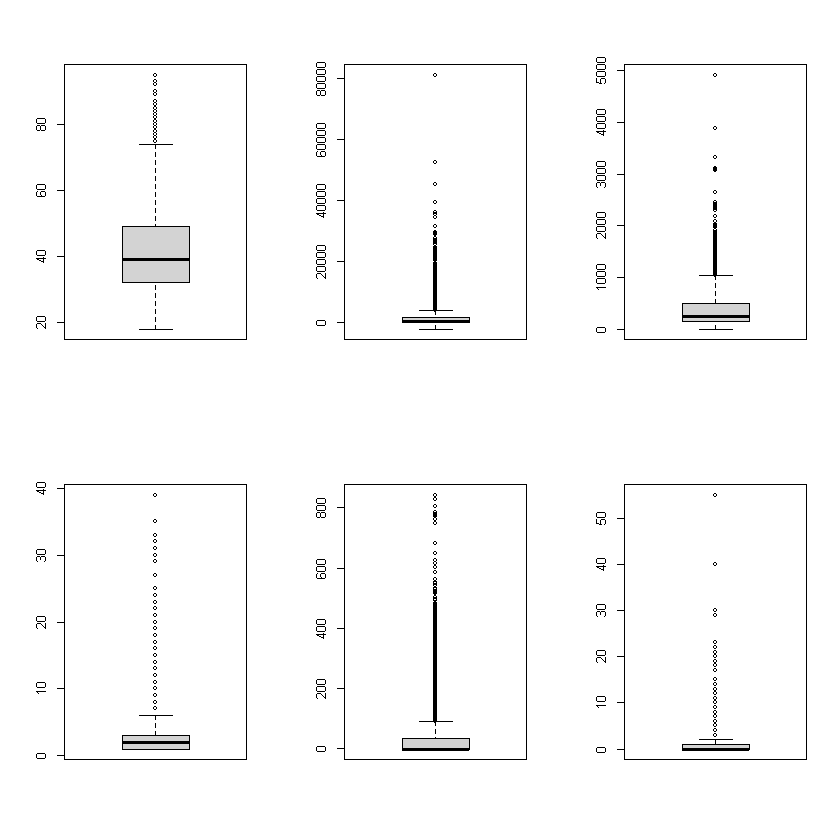

In [22]:
par(mfrow=c(2,3))
boxplot(data_downsampled_train$age)
boxplot(data_downsampled_train$balance)
boxplot(data_downsampled_train$duration)
boxplot(data_downsampled_train$campaign)
boxplot(data_downsampled_train$pdays)
boxplot(data_downsampled_train$previous)

### Model Building

In [23]:
#Logistic
set.seed(1)
model_glm = glm(y ~ ., family="binomial",data = data_downsampled_train)
summary(model_glm)
# age, marital, default, day, pdays and previous are insignificant


Call:
glm(formula = y ~ ., family = "binomial", data = data_downsampled_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.3386  -0.5707  -0.0286   0.5662   2.8532  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.024e+00  3.457e-01  -2.962 0.003061 ** 
age                 3.848e-03  4.185e-03   0.919 0.357920    
jobblue-collar     -3.169e-01  1.364e-01  -2.324 0.020124 *  
jobentrepreneur    -2.814e-01  2.263e-01  -1.244 0.213636    
jobhousemaid       -1.704e-01  2.406e-01  -0.708 0.478747    
jobmanagement      -1.660e-01  1.403e-01  -1.183 0.236883    
jobretired          3.279e-01  1.913e-01   1.714 0.086545 .  
jobself-employed   -2.695e-01  2.102e-01  -1.282 0.199675    
jobservices        -2.078e-01  1.597e-01  -1.301 0.193133    
jobstudent          5.270e-01  2.206e-01   2.389 0.016902 *  
jobtechnician      -1.729e-01  1.289e-01  -1.342 0.179667    
jobunemployed      -2.082e-03  2.143e-01  -0.01

In [24]:
library(car)

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some




In [26]:
set.seed(1)
model_glm2 = glm(y ~ .- age-marital-default-day-pdays-previous, family="binomial",data = data_downsampled_train)
summary(model_glm2)


Call:
glm(formula = y ~ . - age - marital - default - day - pdays - 
    previous, family = "binomial", data = data_downsampled_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.3623  -0.5699  -0.0304   0.5640   2.8004  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -7.760e-01  2.093e-01  -3.707 0.000210 ***
jobblue-collar     -3.479e-01  1.353e-01  -2.571 0.010136 *  
jobentrepreneur    -3.237e-01  2.250e-01  -1.439 0.150201    
jobhousemaid       -1.969e-01  2.387e-01  -0.825 0.409514    
jobmanagement      -1.788e-01  1.397e-01  -1.280 0.200642    
jobretired          3.432e-01  1.699e-01   2.021 0.043322 *  
jobself-employed   -2.721e-01  2.091e-01  -1.301 0.193182    
jobservices        -2.093e-01  1.592e-01  -1.314 0.188783    
jobstudent          6.326e-01  2.119e-01   2.985 0.002836 ** 
jobtechnician      -1.611e-01  1.285e-01  -1.254 0.209816    
jobunemployed      -2.162e-02  2.135e-01  -0.101 0.91

In [27]:
vif(model_glm2)
#No multicollenearity

,GVIF,Df,GVIF^(1/(2*Df))
job,2.650408,11,1.045301
education,2.287001,3,1.147830
balance,1.057595,1,1.028394
housing,1.379234,1,1.174408
loan,1.057957,1,1.028571
contact,1.833042,2,1.163572
month,2.473173,11,1.042018
duration,1.247018,1,1.116700
campaign,1.076460,1,1.037526
poutcome,1.194498,3,1.030064


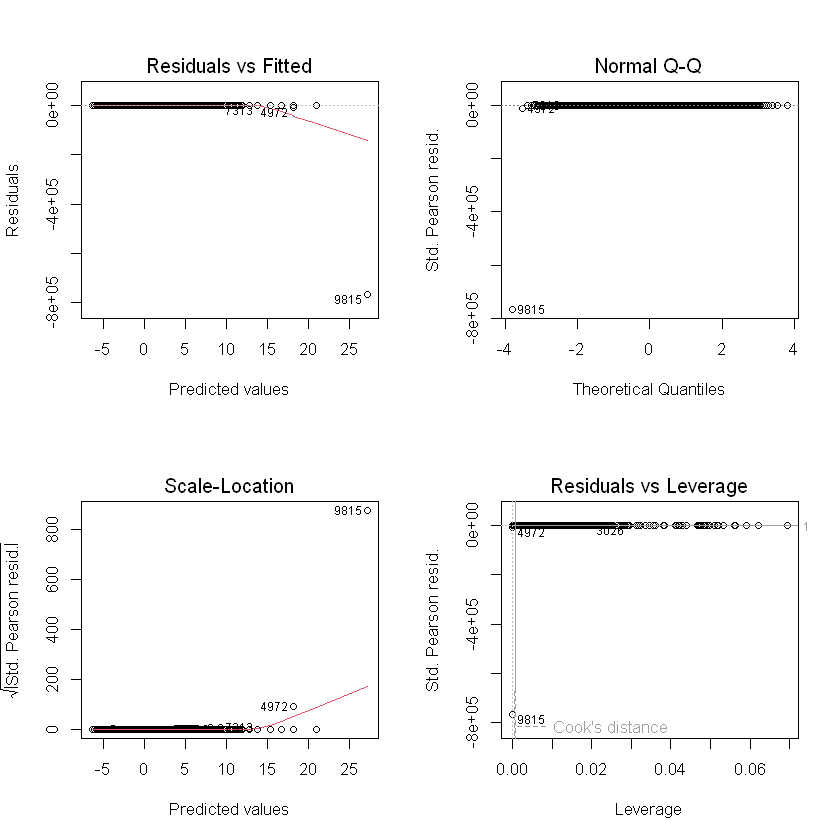

In [28]:
par(mfrow=c(2,2)) 
plot(model_glm2)

In [29]:
library(aod)

In [30]:
(coef(model_glm2))
length(coef(model_glm2))

(Intercept)     jobblue-collar    jobentrepreneur       jobhousemaid 
     -7.759608e-01      -3.478738e-01      -3.236961e-01      -1.968831e-01 
     jobmanagement         jobretired   jobself-employed        jobservices 
     -1.787601e-01       3.432470e-01      -2.721422e-01      -2.092615e-01 
        jobstudent      jobtechnician      jobunemployed         jobunknown 
      6.326139e-01      -1.611077e-01      -2.162286e-02      -8.393429e-01 
educationsecondary  educationtertiary   educationunknown            balance 
      3.552237e-01       5.674140e-01       3.880767e-01       3.802576e-05 
        housingyes            loanyes   contacttelephone     contactunknown 
     -1.004285e+00      -5.806718e-01       1.558103e-02      -1.642824e+00 
          monthaug           monthdec           monthfeb           monthjan 
     -1.014455e+00       1.111638e+00      -1.463168e-01      -9.917254e-01 
          monthjul           monthjun           monthmar           monthmay 
     -1.181955e+00       1.952385e-01       2.339066e+00      -6.376161e-01 
          monthnov           monthoct           monthsep           duration 
     -1.132915e+00       1.475201e+00       6.488117e-01       6.059328e-03 
          campaign      poutcomeother    poutcomesuccess    poutcomeunknown 
     -8.387627e-02       2.390853e-01       2.420105e+00      -3.726137e-01

[1] 36

In [31]:
wald.test(b=coef(model_glm), Sigma = vcov(model_glm), Terms=2:length(coef(model_glm)))

Wald test:
----------

Chi-squared test:
X2 = 1831.0, df = 42, P(> X2) = 0.0

In [32]:
wald.test(b=coef(model_glm2), Sigma = vcov(model_glm2), Terms=2:length(coef(model_glm2)))

Wald test:
----------

Chi-squared test:
X2 = 1829.6, df = 35, P(> X2) = 0.0

In [33]:
#importance of a predictor variable on the response(Odds Ratio)
exp(cbind(OR = coef(model_glm2), confint(model_glm2)))

Waiting for profiling to be done...

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: a

,OR,2.5 %,97.5 %
(Intercept),0.4602614,0.3051157,0.6933242
jobblue-collar,0.7061880,0.5415879,0.9205711
jobentrepreneur,0.7234701,0.4639101,1.1211024
jobhousemaid,0.8212866,0.5124848,1.3071042
jobmanagement,0.8363065,0.6359170,1.0996600
jobretired,1.4095169,1.0111136,1.9682329
jobself-employed,0.7617459,0.5048727,1.1465045
jobservices,0.8111831,0.5932158,1.1075470
jobstudent,1.8825248,1.2464186,2.8623355
jobtechnician,0.8512004,0.6616975,1.0949944


In [34]:
varImp(model_glm2)

,Overall
,<dbl>
jobblue-collar,2.5711430
jobentrepreneur,1.4388225
jobhousemaid,0.8247493
jobmanagement,1.2797235
jobretired,2.0205914
jobself-employed,1.3012241
jobservices,1.3141893
jobstudent,2.9850142
jobtechnician,1.2540718


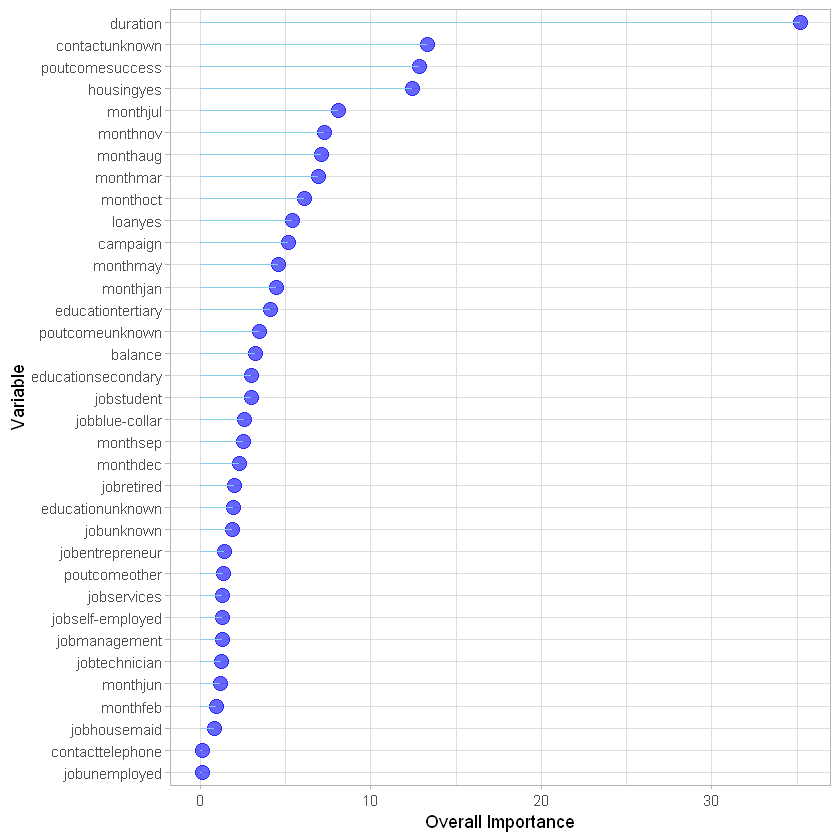

In [35]:
#Variable Importance (Relative Importance of variables)
V = caret::varImp(model_glm2)

ggplot2::ggplot(V, aes(x=reorder(rownames(V),Overall), y=Overall)) +
geom_point( color="blue", size=4, alpha=0.6)+
geom_segment( aes(x=rownames(V), xend=rownames(V), y=0, yend=Overall), 
color='skyblue') +
xlab('Variable')+
ylab('Overall Importance')+
theme_light() +
coord_flip() 

In [36]:
actual <- data_downsampled_train$y
predicted <- round(fitted(model_glm2))
xt <- xtabs(~ actual + predicted)
xt

      predicted
actual    0    1
   no  2989  511
   yes  621 2879

In [37]:
accuracy <- (xt[1,1]+xt[2,2])/sum(xt)
round(accuracy,3)

[1] 0.838

In [38]:
library(caret) #For confusion matrix

In [39]:
confusionMatrix(as.factor(ifelse(predict(model_glm2,data_downsampled_test[,1:16], type='response')>0.5,'yes','no')),data_downsampled_test$y)

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1267  252
       yes  233 1248
                                          
               Accuracy : 0.8383          
                 95% CI : (0.8247, 0.8513)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6767          
                                          
 Mcnemar's Test P-Value : 0.4137          
                                          
            Sensitivity : 0.8447          
            Specificity : 0.8320          
         Pos Pred Value : 0.8341          
         Neg Pred Value : 0.8427          
             Prevalence : 0.5000          
         Detection Rate : 0.4223          
   Detection Prevalence : 0.5063          
      Balanced Accuracy : 0.8383          
                                          
       'Positive' Class : no              
                        

In [40]:
prediction_glm <- as.data.frame(predict(model_glm2,newdata=data_downsampled_test[,1:16],type="response"))
prediction_glm['y']<-data_downsampled_test$y
colnames(prediction_glm)[1] <- 'Probability'

In [41]:
prediction_glm<-prediction_glm[order(prediction_glm$Probability,decreasing=FALSE),]
prediction_glm$rank<-1:nrow(prediction_glm)

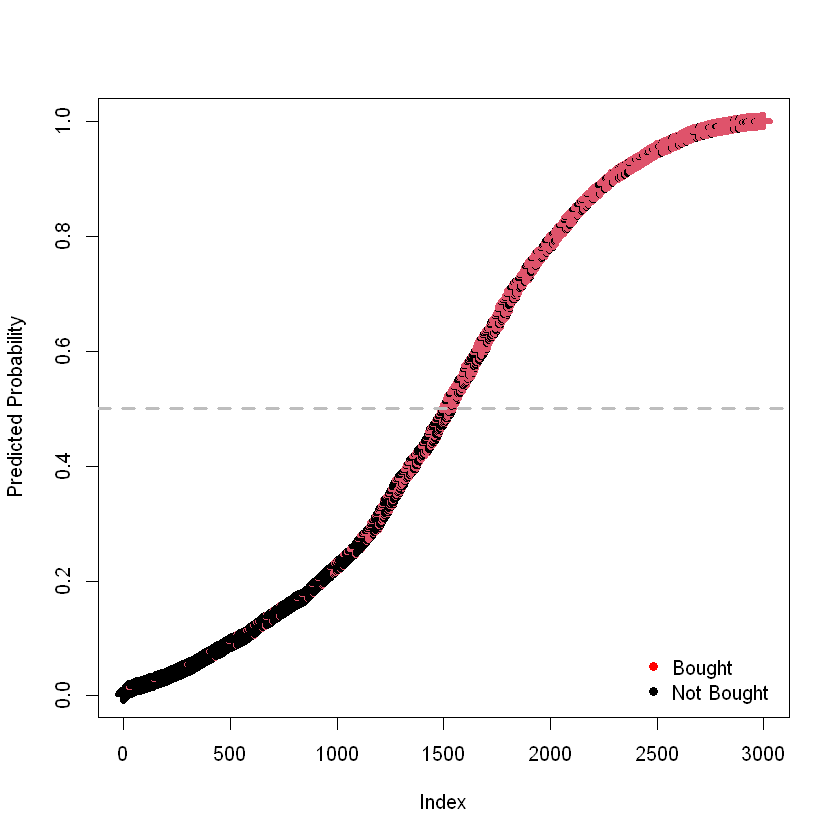

In [42]:
plot(prediction_glm$rank,prediction_glm$Probability,col = prediction_glm$y,pch = 3, lwd=5, xlab="Index",ylab="Predicted Probability")
legend("bottomright", legend=c("Bought", "Not Bought"),col=c("red", "black"), pch = 19, bty = "n")
abline(h =0.5 , col="grey", lwd=3, lty=2)

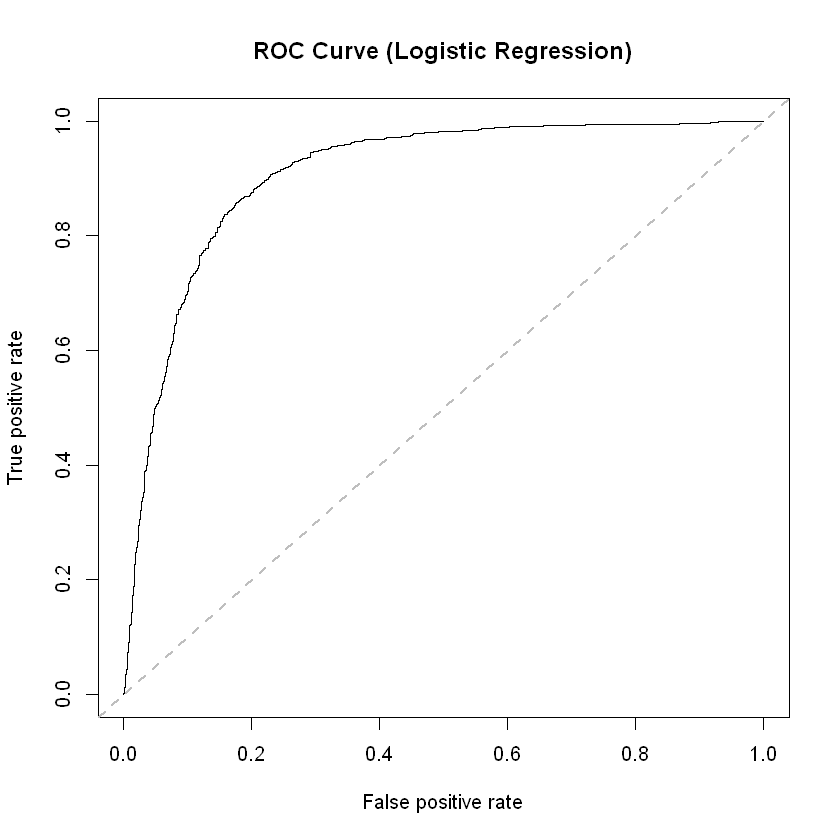

In [43]:
library(ROCR)
roc_glm <- prediction((predict(model_glm2,data_downsampled_test[,1:16],type='response')), data_downsampled_test$y)
performance_glm <- performance(roc_glm, 'tpr','fpr')
plot(performance_glm, colorize = FALSE, text.adj = c(-0.2,1.7),main="ROC Curve (Logistic Regression)")
abline(a=0,b=1,lwd=2,lty=2,col="grey")

In [44]:
aucvalue_glm <- performance(roc_glm, measure = "auc")
aucvalue_glm <- aucvalue_glm@y.values[[1]]
paste('AUC =',aucvalue_glm)

[1] "AUC = 0.907408444444444"